# KNN exercise with NBA player data

## Introduction

- NBA player statistics from 2014-2015 (partial season): [data](https://github.com/JamesByers/GA-SEA-DAT1/blob/master/data/NBA_players_2015.csv), [data dictionary](https://github.com/JamesByers/GA-SEA-DAT1/blob/master/slides/07_nba_paper.pdf)
- **Problem to solve:** Predict player position using assists, steals, blocks, turnovers, and personal fouls

## Step 1: Read the data into Pandas

In [2]:
# read the data into a DataFrame named nba
import pandas as pd
path = '../data/'
url = path + 'NBA_players_2015.csv'
nba = pd.read_csv(url, index_col=0)

In [4]:
# examine the columns names to see what's there
nba.columns

Index(['season_end', 'player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp',
       'fg', 'fga', 'fg_', 'x3p', 'x3pa', 'x3p_', 'x2p', 'x2pa', 'x2p_', 'ft',
       'fta', 'ft_', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM',
       'BPM', 'VORP'],
      dtype='object')

In [12]:
# examine the number of players in each position to get a feel for the data
nba.groupby(["pos"]).count()

,season_end,player,age,bref_team_id,g,gs,mp,fg,fga,fg_,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
pos,,,,,,,,,,,,,,,,,,,,,
C,79,79,79,79,79,79,79,79,79,79,...,79,79,79,79,79,79,79,79,79,79
F,199,199,199,199,199,199,199,199,199,199,...,199,199,199,199,199,199,199,199,199,199
G,200,200,200,200,200,200,200,200,200,200,...,200,200,200,200,200,200,200,200,200,200


In [10]:
nba.groupby(["pos"]).mean()

,season_end,age,g,gs,mp,fg,fga,fg_,x3p,x3pa,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
pos,,,,,,,,,,,,,,,,,,,,,
C,2015.0,26.759494,42.012658,23.620253,19.126582,2.989873,5.922785,0.495608,0.058228,0.186076,...,15.159494,17.755696,1.217722,1.239241,2.460759,0.097392,-2.418987,0.950633,-1.470886,0.513924
F,2015.0,26.934673,41.879397,18.788945,19.141709,2.846734,6.321608,0.440688,0.558291,1.657789,...,12.425628,17.953266,1.017085,0.987437,2.001508,0.090070,-1.370854,-0.251256,-1.621608,0.487940
G,2015.0,26.140000,42.365000,19.475000,21.308000,3.200000,7.736500,0.391610,0.928500,2.712000,...,13.732500,20.330500,1.030500,0.849500,1.881500,0.047755,-1.019000,-1.310500,-2.329000,0.473000


## Step 2: Create X and y

Use the following features: assists, steals, blocks, turnovers, personal fouls

In [13]:
# map positions to numbers
# Specifically map the position names (C, F and G) to numbers starting with 0
#   and store them in a new column named 'pos_num'.
# We need to do this because KNN model algorithms require that the features
#   and responses be numeric.
nba['pos_num'] = nba.pos.map({'C':0, 'F':1, 'G':2})

In [22]:
# create feature matrix (X) (it is a dataframe) that contains these columns from the nba dataframe:
# 'ast', 'stl', 'blk', 'tov', 'pf'
cols = ['ast', 'stl', 'blk', 'tov', 'pf']
X = nba[cols]

In [23]:
# create response vector (y) that contains the position numbers (our labels)
y = nba.pos_num

## Step 3: Train a KNN model (K=5)

In [15]:
# import KNN class we need from scikit-learn
from sklearn.neighbors import KNeighborsClassifier

In [16]:
# instantiate the estimator with K=5
knn = KNeighborsClassifier(n_neighbors=5)

In [24]:
print(X.sample(10))
print(y.sample(10))

     ast  stl  blk  tov   pf
171  0.6  0.4  0.2  0.8  2.2
64   5.6  1.3  0.2  3.7  1.9
391  0.8  0.1  0.7  1.3  2.5
105  0.9  0.4  1.3  1.2  2.2
377  8.0  1.4  0.1  3.1  2.3
317  1.3  0.2  0.0  0.5  0.6
459  0.4  0.1  0.0  0.3  0.4
210  0.3  0.1  0.4  0.6  1.3
310  1.2  1.2  0.3  1.5  2.7
77   0.2  0.2  0.2  0.5  0.5
181    2
70     2
232    1
48     1
392    2
393    2
220    2
52     0
17     2
252    0
Name: pos_num, dtype: int64


In [25]:
# run a knn.fit on the data to build the model
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## Step 4: Use the model:
## Predict player position and calculate predicted probability of each position

Predict for a player with these statistics: 1 assist, 1 steal, 0 blocks, 1 turnover, 2 personal fouls

In [27]:
# create a list to represent a player
player = [1, 1, 0, 1, 2]

In [28]:
# make a prediction with the model
knn.predict([player])

array([2])

In [30]:
# calculate the predicted probabilities
knn.predict_proba([player])

array([[ 0. ,  0.2,  0.8]])

## Step 5: Repeat steps 3 and 4 using K=50

In [34]:
# repeat for K=50
k50 = KNeighborsClassifier(n_neighbors=50)
k50.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform')

In [35]:
# calculate predicted probabilities
k50.predict_proba([player])

array([[ 0.06,  0.62,  0.32]])

## Bonus: Explore the features to ones ones that likely are the most predictive

In [37]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF3366', '#00FF00', '#0000FF'])

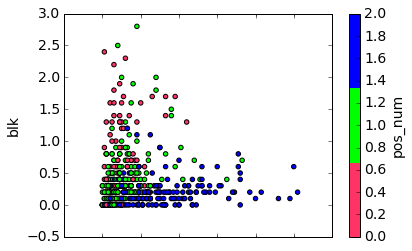

In [44]:
# get a describe of assists grouped by position.  Use .unstack() to format the output
nba.plot(kind='scatter', x='ast', y='blk', c='pos_num', colormap=cmap_bold) 

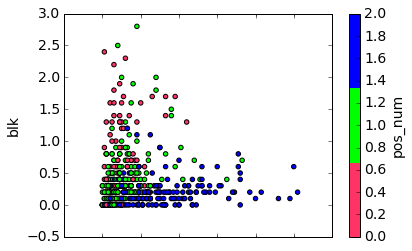

In [58]:
# box plot of assists grouped by position
nba.plot(kind='scatter', x='ast', y='blk', c='pos_num', colormap=cmap_bold) 

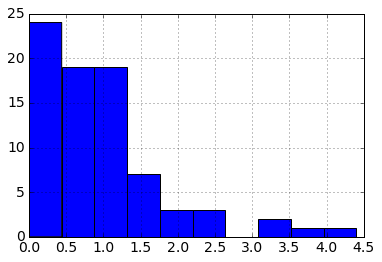

In [85]:
# group plot of histograms of assists grouped by position
# nba.plot(kind='hist', x='pos_num', y='ast') 
nba['ast'][nba.pos_num == 0].hist()

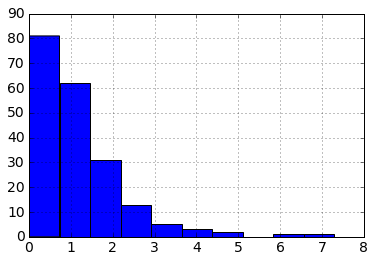

In [83]:
nba['ast'][nba.pos_num == 1].hist()

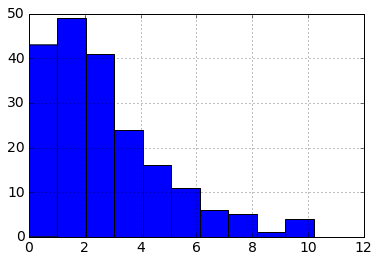

In [84]:
nba['ast'][nba.pos_num == 2].hist()

In [89]:
nba.pos_num.unique()

array([1, 2, 0])

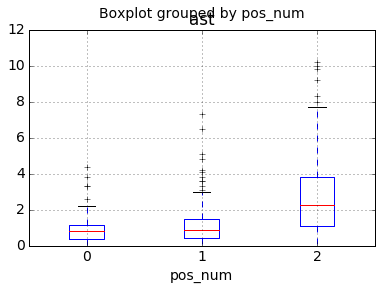

In [90]:
nba.boxplot(column="ast", by="pos_num")

AttributeError: 'numpy.ndarray' object has no attribute 'unstack'

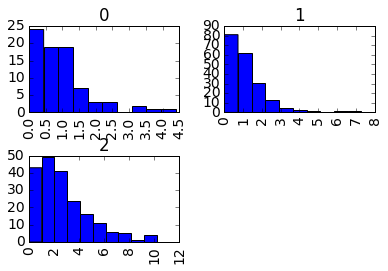

In [92]:
nba.hist(column="ast", by="pos_num")

In [72]:
print(nba["ast"].min())
print(nba["ast"].max())

0.0
10.2


In [ ]:
nba["ast"].sample(20)